In [1]:
# import python packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from iteround import saferound

# matplotlib magic command to make sure plots appear inline
%matplotlib inline

# set seaborn colour codes and palette
sns.set(color_codes=True)
sns.set_palette("Set2");

#set figure size
plt.rcParams['figure.figsize'] = [15, 4]

# Real World Data

In [2]:
# imported csv 
pl = pd.read_csv("league_table.csv", index_col="Team", names=["Team", "Home(F)", "Home(A)", "Points(H)", "Away(F)", "Away(A)", "Points(A)" ]);

This notebook will explored the goals scored, and points gained, by premier league team at home and away from home, over the course of a season. The dataset used is an existing dataset that I had created based on the results of the last Premier League season.

Teams' performance at home tends to be better than their performance away from from. Initial analysis will be carried out on the dataset, examining the goals scored and conceded, goal difference, and points gained at home and away from home.

When that analysis has been completed random data will be generated, using the numpy package, to simulate a league table with those variables.

In [3]:
# added new column of total goals scored
pl["Total(F)"] = pl["Home(F)"] + pl["Away(F)"]
# added new column of total goals conceded
pl["Total(A)"] = pl["Home(A)"] + pl["Away(A)"]
# added new column of difference between goals scored and conceded
pl["Total(Dif)"]= pl["Total(F)"] - pl["Total(A)"]
# added new column with total points
pl["Total(P)"] = pl["Points(H)"] + pl["Points(A)"]

# created dataframe with total goals for, against, difference, and total points
total = pl[["Total(F)", "Total(A)", "Total(Dif)", "Total(P)"]]
total = total.sort_values(by = "Total(P)", ascending=False);
total

,Total(F),Total(A),Total(Dif),Total(P)
Team,,,,
Manchester City,95,23,72,98
Liverpool,89,22,67,97
Chelsea,63,39,24,72
Tottenham,67,39,28,71
Arsenal,73,51,22,70
Manchester United,65,54,11,66
Wolves,47,46,1,57
Everton,54,46,8,54
Leicester City,51,48,3,52


The original dataset only contains data seperated by home and away tables. As such, a combined dataframe was created. This dataframe will used as a reference point for the randomly generated league table.

In [4]:
# description of total table
total.describe()

,Total(F),Total(A),Total(Dif),Total(P)
count,20.000000,20.000000,20.000000,20.000000
mean,53.600000,53.600000,0.000000,53.450000
std,18.071204,15.752694,32.371202,21.007455
min,22.000000,22.000000,-54.000000,16.000000
25%,44.250000,46.000000,-20.750000,39.750000
50%,51.500000,53.500000,-2.500000,51.000000
75%,63.500000,65.750000,13.750000,67.000000
max,95.000000,81.000000,72.000000,98.000000


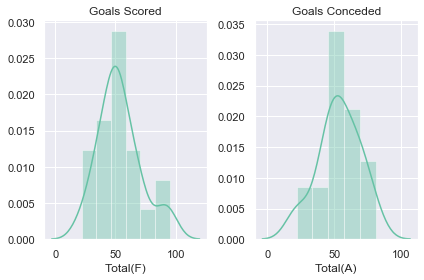

In [5]:
# distibution of goals scored at home across the league
plt.subplot(1,2,1)
sns.distplot(total["Total(F)"])
plt.title("Goals Scored");

# distribution of goals conceded at home across the league
plt.subplot(1,2,2)
sns.distplot(total["Total(A)"])
plt.title("Goals Conceded");

plt.tight_layout()

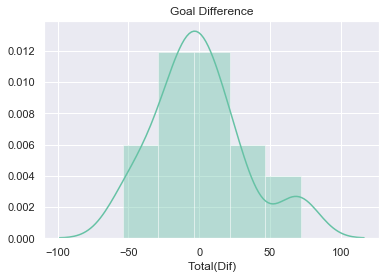

In [6]:
# distribution of goal difference
sns.distplot(total["Total(Dif)"])
plt.title("Goal Difference");

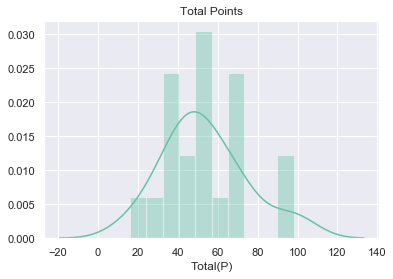

In [76]:
# distribution of total points
sns.distplot(total["Total(P)"], bins = 10)
plt.title("Total Points");

The distribution of points seems to follow a normal(gaussian) distribution.

In [78]:
# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

from scipy.stats import shapiro

stat, p = shapiro(total["Total(P)"])

alpha = 0.05

if p > alpha:
    print("Points Distribution appears to be Gaussian")
else:
    print("Points distribution does not appear to be Gaussian")

Points Distribution appears to be Gaussian


This means that a normal distribution in numpy can be used to generate a teams points total.

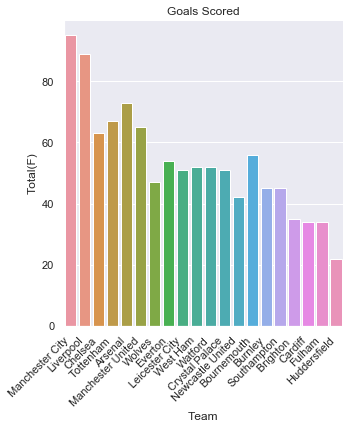

In [8]:
# bar plot of goals scored
goals_for = sns.catplot(x="Team", y="Total(F)", kind="bar", data=total.reset_index())
goals_for.set_xticklabels(rotation=45, horizontalalignment="right")
plt.title("Goals Scored");

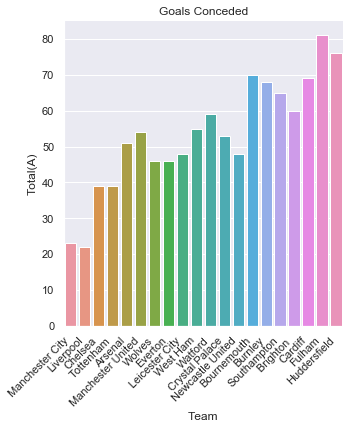

In [9]:
# bar plot of goals conceded
goals_for = sns.catplot(x="Team", y="Total(A)", kind="bar", data=total.reset_index())
goals_for.set_xticklabels(rotation=45, horizontalalignment="right")
plt.title("Goals Conceded");

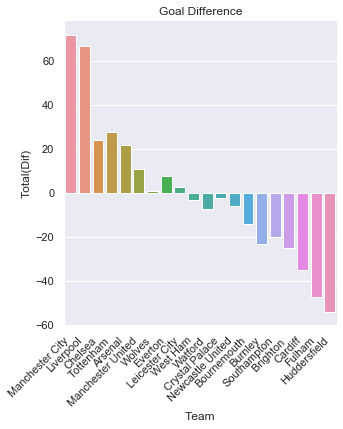

In [10]:
# bar plot of goal difference
goal_dif = sns.catplot(x="Team", y="Total(Dif)", kind="bar", data=total.reset_index())
goal_dif.set_xticklabels(rotation=45, horizontalalignment="right")
plt.title("Goal Difference");

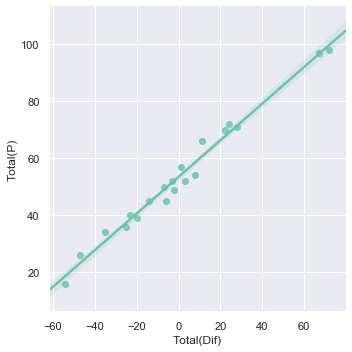

In [11]:
# regression plot between goal difference and total points
sns.lmplot(x="Total(Dif)", y="Total(P)", data=total);

There is a strong correlation between a team's goal difference and total points. Once random goal data has been generated for all teams, the goal difference may be used as the order in which to assign the points to teams.

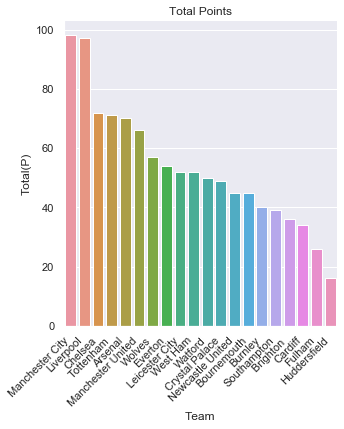

In [12]:
# bar plot of goals scored at home
goals_for = sns.catplot(x="Team", y="Total(P)", kind="bar", data=total.reset_index())
goals_for.set_xticklabels(rotation=45, horizontalalignment="right")
plt.title("Total Points");

## Home

In [13]:
# added new column with home goal difference
pl["Home(Dif)"] = pl["Home(F)"] - pl["Home(A)"]
# created league table based on home form
home = pl[["Home(F)", "Home(A)", "Home(Dif)", "Points(H)"]]
# sorted league table by points
home = home.sort_values(by = "Points(H)", ascending=False);
home

,Home(F),Home(A),Home(Dif),Points(H)
Team,,,,
Manchester City,57,12,45,54
Liverpool,55,10,45,53
Arsenal,42,16,26,45
Chelsea,39,12,27,42
Tottenham,34,16,18,38
Manchester United,33,25,8,36
Wolves,28,21,7,34
Everton,30,21,9,34
West Ham,32,27,5,31


In [14]:
# description of home stats
home.describe()

,Home(F),Home(A),Home(Dif),Points(H)
count,20.000000,20.000000,20.000000,20.000000
mean,29.800000,23.800000,6.000000,30.700000
std,11.542142,7.878017,18.381913,11.494163
min,10.000000,10.000000,-21.000000,9.000000
25%,23.500000,19.000000,-5.000000,23.000000
50%,27.500000,25.000000,4.500000,28.000000
75%,33.250000,28.500000,11.250000,36.500000
max,57.000000,38.000000,45.000000,54.000000


## Away

In [15]:
# added new column with away goal difference
pl["Away(Dif)"] = pl["Away(F)"] - pl["Away(A)"]
# created league table based on away form
away = pl[["Away(F)", "Away(A)", "Away(Dif)", "Points(A)"]]
# sorted league table by points
away = away.sort_values(by="Points(A)", ascending=False);
away

,Away(F),Away(A),Away(Dif),Points(A)
Team,,,,
Manchester City,38,11,27,44
Liverpool,34,12,22,44
Tottenham,33,23,10,33
Chelsea,24,27,-3,30
Manchester United,32,29,3,30
Crystal Palace,32,30,2,29
Leicester City,27,28,-1,25
Arsenal,31,35,-4,25
Watford,26,31,-5,23


In [16]:
# description of away stats
away.describe()

,Away(F),Away(A),Away(Dif),Points(A)
count,20.000000,20.000000,20.000000,20.000000
mean,23.800000,29.800000,-6.000000,22.750000
std,7.831112,9.225822,15.245362,10.361238
min,12.000000,11.000000,-33.000000,5.000000
25%,18.000000,25.000000,-16.250000,16.000000
50%,24.000000,29.500000,-5.000000,22.000000
75%,31.250000,35.000000,-0.250000,29.250000
max,38.000000,45.000000,27.000000,44.000000


## Home vs. Away

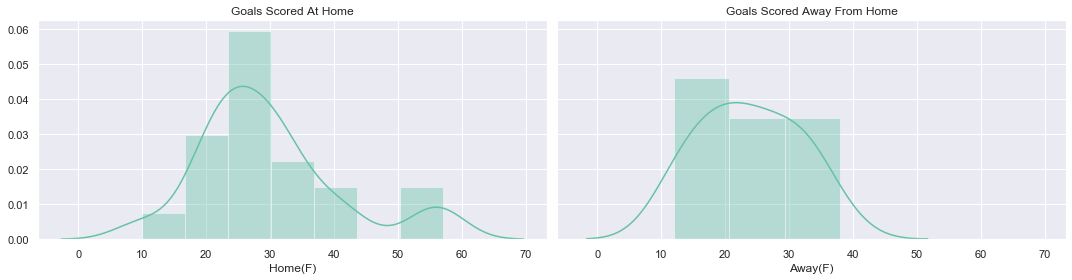

In [17]:
# set up matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 4), sharex=True, sharey=True)

# distribution of goals scored at home
sns.distplot(home["Home(F)"], ax=axes[0])
axes[0].set_title("Goals Scored At Home");

# distibution of goals scored away from home across the league
sns.distplot(away["Away(F)"], ax= axes[1])
axes[1].set_title("Goals Scored Away From Home");

plt.tight_layout()



There is a marked difference between the number, and distribution, of goals scored at home and away from home. This difference will have to be accounted for when generating random data for goals scored.

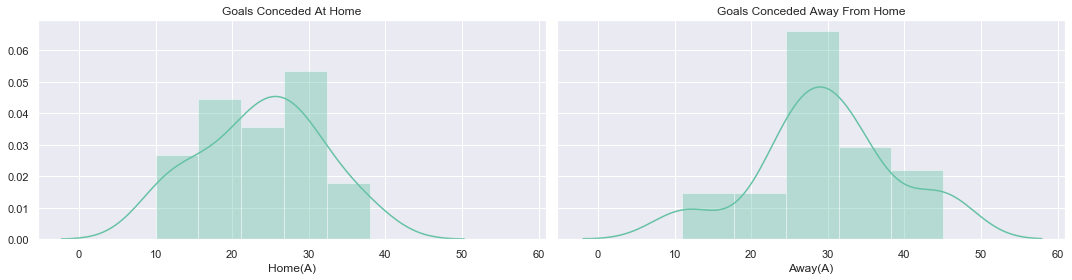

In [18]:
# set up matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 4), sharex=True, sharey=True)

# distribution of goals conceded at home
sns.distplot(home["Home(A)"], ax=axes[0])
axes[0].set_title("Goals Conceded At Home");

# distibution of goals conceded away from home 
sns.distplot(away["Away(A)"], ax= axes[1])
axes[1].set_title("Goals Conceded Away From Home");

plt.tight_layout()


This difference is also visible when it comes to goals conceded.

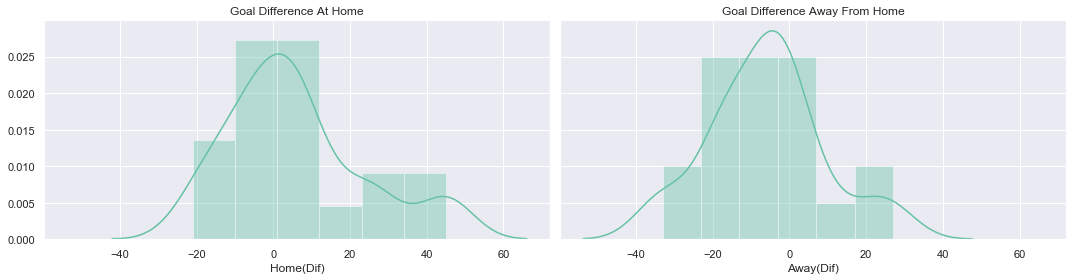

In [19]:
# set up matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 4), sharey=True, sharex=True)

# distribution of goals difference at home
sns.distplot(home["Home(Dif)"], ax=axes[0])
axes[0].set_title("Goal Difference At Home");

# distibution of goals difference away from home 
sns.distplot(away["Away(Dif)"], ax= axes[1])
axes[1].set_title("Goal Difference Away From Home");

plt.tight_layout()


Logically, it follows that this difference is evident when viewing goal difference at home and away from home.

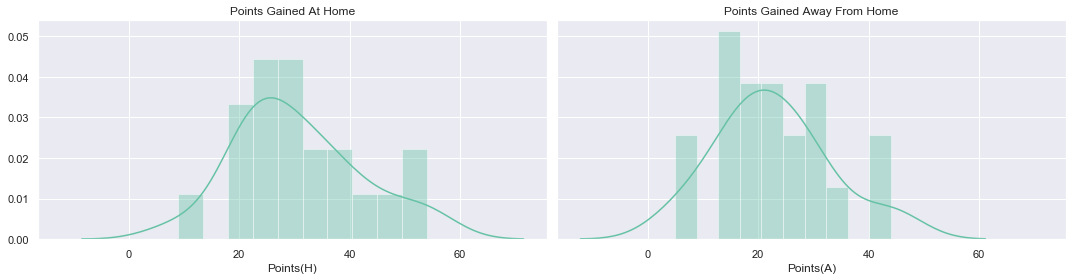

In [73]:
# set up matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 4), sharey=True, sharex=True)

# distribution of goals scored at home
sns.distplot(home["Points(H)"], bins= 10, ax=axes[0])
axes[0].set_title("Points Gained At Home");

# distibution of goals scored away from home across the league
sns.distplot(away["Points(A)"], bins= 10, ax= axes[1])
axes[1].set_title("Points Gained Away From Home");

plt.tight_layout()


The points gained at home higher and have a greater density at the higher numbers also.

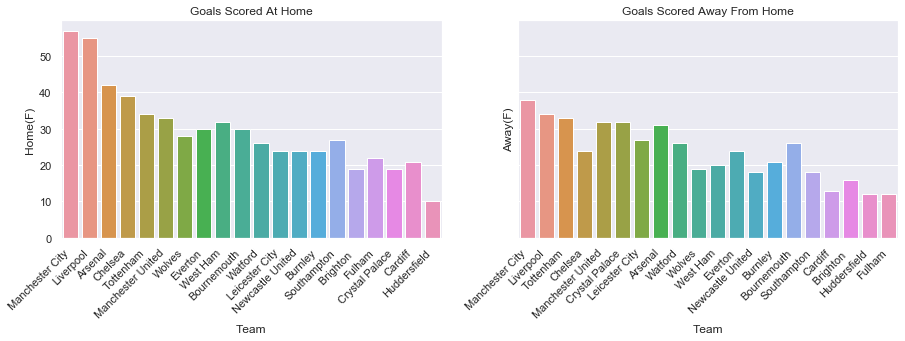

In [21]:
# set up matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 4), sharey=True)

# distribution of goals scored at home
goals_for = sns.catplot(x="Team", y="Home(F)", kind="bar", data=home.reset_index(), ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment="right")
axes[0].set_title("Goals Scored At Home");

# distibution of goals scored away from home 
goals_for = sns.catplot(x="Team", y="Away(F)", kind="bar", data=away.reset_index(), ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment="right")
axes[1].set_title("Goals Scored Away From Home");

plt.tight_layout()

# closed empty plots
plt.close(2)
plt.close(3)




Here, we can see that most teams score less goals away from home with few exceptions.

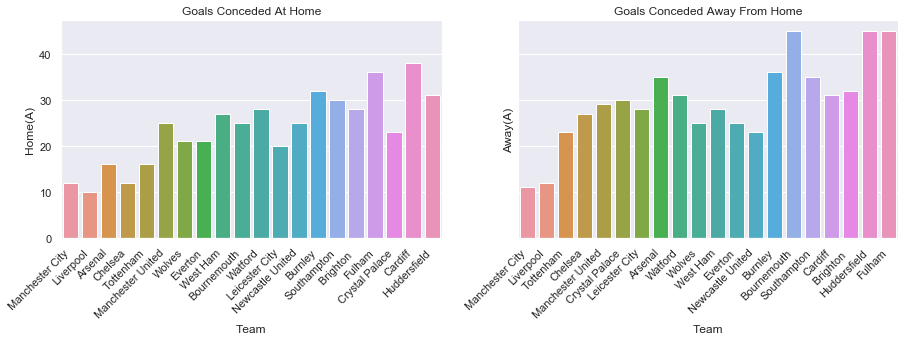

In [22]:
# set up matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 4), sharey=True)

# distribution of goals conceded at home
goals_for = sns.catplot(x="Team", y="Home(A)", kind="bar", data=home.reset_index(), ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment="right")
axes[0].set_title("Goals Conceded At Home");

# distibution of goals conceded away from home 
goals_for = sns.catplot(x="Team", y="Away(A)", kind="bar", data=away.reset_index(), ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment="right")
axes[1].set_title("Goals Conceded Away From Home");

plt.tight_layout()

# closed empty plots
plt.close(2)
plt.close(3)


The same is also true of goals conceded.

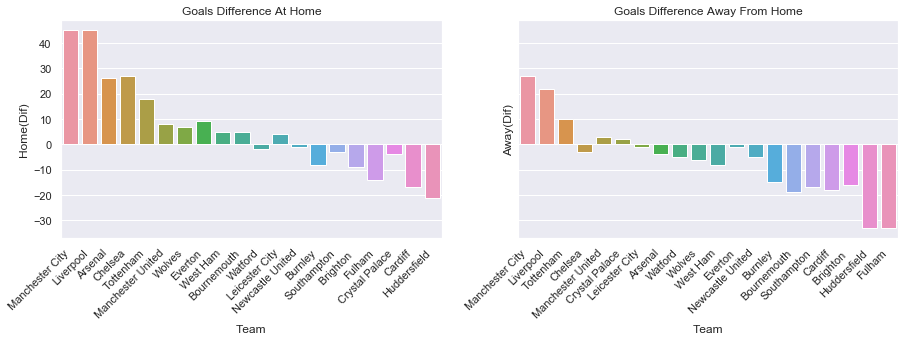

In [23]:
# set up matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 4), sharey=True)

# distribution of goals conceded at home
goals_for = sns.catplot(x="Team", y="Home(Dif)", kind="bar", data=home.reset_index(), ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment="right")
axes[0].set_title("Goals Difference At Home");

# distibution of goals conceded away from home 
goals_for = sns.catplot(x="Team", y="Away(Dif)", kind="bar", data=away.reset_index(), ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment="right")
axes[1].set_title("Goals Difference Away From Home");

plt.tight_layout()

# closed empty plots  
plt.close(2)
plt.close(3)


This is further evident when viewing goal difference, with far more teams having a minus goal difference away from home.

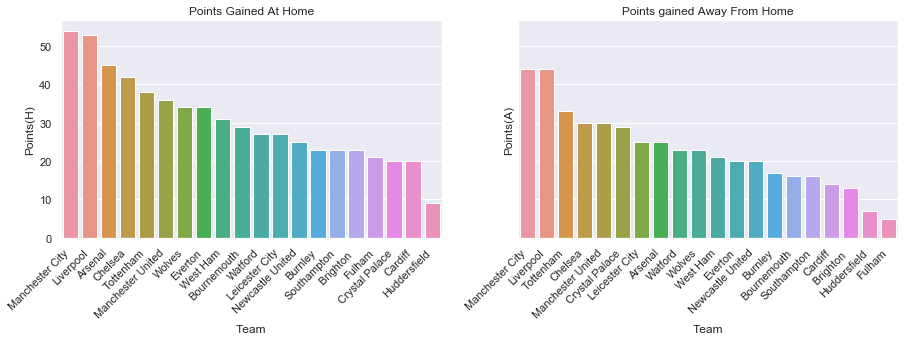

In [24]:
# set up matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 4), sharey=True)

# bar plot of points gained at home
goals_for = sns.catplot(x="Team", y="Points(H)", kind="bar", data=home.reset_index(), ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment="right")
axes[0].set_title("Points Gained At Home");

# bar plot of points gained away from home 
goals_for = sns.catplot(x="Team", y="Points(A)", kind="bar", data=away.reset_index(), ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment="right")
axes[1].set_title("Points gained Away From Home");

plt.tight_layout()

# closed empty plots
plt.close(2)
plt.close(3)


And again we can see that almost all times have accumulated less points away from home.

## Characteristics To Consider When Generating Random Data

Due to marked difference between home and away form the random data will be generated under different parameters for home and away before being combined into a total table at the end. Each time will be assigned an attacking coefficient based on the number of goals scored at home divided by the number of games played at home. This number will then be divided by the average number of home goals score across the league. This coefficient will be used as a parameter when generating the number of goals scored by each team.

A defensive coefficient will similarily be assigned based on the number of goals conceded by a team at home divided by the number of games played at home. This number will then be divided by the average number of goals conceded by each team at home.

The same model will then be applied to a team's away data. Once random goal data each team's goal difference will be calculated. As noted previously, a higher goal difference correlates with a higher points total. As such a teams goal difference will be divided by the average goal difference at home or away and used as a parameter for the chosen numpy.random distribution to generate random point totals.

## numpy.random distriubtion

Upon researching different distributions available in numpy for generating random data it was decided the the poisson distribution was the most suitable. The poisson distribution accepts two inputs; lam, the expection of interval, and the size of the output. The coefficients mentioned in the previous section can be used to generate the lam values and the output size will be the number of teams in the league.

In [25]:
# example
np.random.poisson(lam=(10,25,19,13,33,23,11,34,21,31,11,22,33,44,55,12,17,8,15,5), size=(20))

array([ 6, 27, 14, 10, 30, 15, 11, 30, 13, 31, 13, 15, 42, 45, 72, 10, 15,
       10, 18,  5])

# Random Home Data

## Goals Scored

In [26]:
# description of home dataframe
home.mean()

Home(F)      29.8
Home(A)      23.8
Home(Dif)     6.0
Points(H)    30.7
dtype: float64

Here we have the mean data needed to calculate the coefficients of each team.

In [27]:
home = home.sort_values(by = "Team")
home

,Home(F),Home(A),Home(Dif),Points(H)
Team,,,,
Arsenal,42,16,26,45
Bournemouth,30,25,5,29
Brighton,19,28,-9,23
Burnley,24,32,-8,23
Cardiff,21,38,-17,20
Chelsea,39,12,27,42
Crystal Palace,19,23,-4,20
Everton,30,21,9,34
Fulham,22,36,-14,21


In [28]:
# average goals score per home game by home team
29.8/19

1.568421052631579

In [29]:
# array of home team's goals score 
home_ac = (42, 30, 19, 24, 21, 39, 19, 30, 22, 10, 24, 55, 57, 33, 24, 27, 34, 26, 32, 28)

# divided goals by number of games 
home_ac = np.divide(home_ac, 19)

# divided by average of goal per game and multiplied by average goals 
home_ac = (np.divide(home_ac, 1.57))*29.8


In [30]:
# imported blank league table in alphabetical order
pl_new = pd.read_csv("league_table_blank.csv", index_col="Team", names=["Team", "Home(F)", "Home(A)", "Away(F)", "Away(A)"]);

In [31]:
# added home goals scored to dataframe
pl_new["Home(F)"] = np.random.poisson(lam=home_ac, size=(20))

## Goals Conceded

In [32]:
# average goals conceded per home game by home team
23.8/19

1.2526315789473685

In [33]:
# array of goals conceded by home teams
home_dc = (16, 25, 28, 32, 38, 12, 23, 21, 36, 31, 20, 10, 12, 25, 25, 30, 16, 28, 27, 21)

# divided goals by number of games 
home_dc = np.divide(home_dc, 19)

# divided by average goals per game and multiplied by average goals conceded at home
home_dc = (np.divide(home_dc, 1.25))*23.8
           
                                                                                                           

In [34]:
# added goals conceded at home to dataframe 
pl_new["Home(A)"] = np.random.poisson(lam=home_dc, size=(20))

In [35]:
# added home goal difference to dataframe
pl_new["Home(Dif)"] = pl_new["Home(F)"] - pl_new["Home(A)"]

# Random Away Team Data

In [36]:
# mean of away dataframe
away.mean()

Away(F)      23.80
Away(A)      29.80
Away(Dif)    -6.00
Points(A)    22.75
dtype: float64

In [37]:
# alphabethically ordered away team table 
away = away.sort_values(by = "Team")
away

,Away(F),Away(A),Away(Dif),Points(A)
Team,,,,
Arsenal,31,35,-4,25
Bournemouth,26,45,-19,16
Brighton,16,32,-16,13
Burnley,21,36,-15,17
Cardiff,13,31,-18,14
Chelsea,24,27,-3,30
Crystal Palace,32,30,2,29
Everton,24,25,-1,20
Fulham,12,45,-33,5


The total goals scored away from home must be equal to the total number of goals conceded at home. Likewise the total goals conceded away from home must be equal to the total number of goals scored at home. The method used to achieve this will be to generate a random array of goals conceded by each team. This goals will then be divided by the sum of all goals conceded away from home and multiple by the total number of goals scored at home. The will give an array of floats which will need to be converted to integers while still retaining the original sum. This will be achieved by using saferound function of the iteround package.

## Goals Scored 

In [38]:
# average goals scored by away team per game
23.8/19

1.2526315789473685

In [39]:
# away team attacking coefficient in alphabetical order
away_ac = (31, 26, 16, 21, 13, 24, 32, 24, 12, 12, 27, 34, 38, 32, 18, 18, 33, 26, 20, 19)

away_ac = np.divide(away_ac, 19)

away_ac = (np.divide(away_ac, 1.25))*23.8;

In [40]:
# total home goals conceded 
tha = pl_new["Home(A)"].sum()

# generated random goals scored data for each team
awf = np.random.poisson(lam=away_ac, size=(20))

# calculated sum of random array
awfsum = awf.sum()

# divide array by its sum 
awf = np.divide(awf, awfsum)

# multiplied by sum of total goals conceded at home 
awf = awf*tha

# round floats to integers while maintaining sum
awf = saferound(awf, places=0)

# converted list to array 
awf = np.asarray(awf)

# converted type from float to array 
awf = awf.astype(int)

# added new column to array of goals scored away from home
pl_new["Away(F)"] = awf;

## Goals Conceded 

In [41]:
# average goals conceded per game by away team
29.8/19

1.568421052631579

In [42]:
# array containing number of goals each team conceded in the previous season
away_dc = (35, 45, 32, 36, 31, 27, 30, 25, 45, 45, 28, 12, 11, 29, 23, 35, 23, 31, 28, 25)

# divided contents of array by number of games played  
away_dc = np.divide(away_dc, 19)

# divided contents of array by average goals conceded per match and multiplied by average goals 
away_dc = (np.divide(away_dc, 1.57))*29.8;


In [43]:
# total home goals scored 
thf = pl_new["Home(F)"].sum()

# generated random goals conceded data for each team
awa = np.random.poisson(lam=away_dc, size=(20))

# calculated sum of random array
awasum = awa.sum()

# divide array by its sum 
awa = np.divide(awa, awasum)

# multiplied by sum of total goals scored at home 
awa = awa*thf

# round floats to integers while maintaining sum
awa = saferound(awa, places=0)

# converted list to array 
awa = np.asarray(awa)

# converted type from float to array 
awa = awa.astype(int)

# added new column to data frame of goals conceded away from home 
pl_new["Away(A)"] = awa;

In [44]:
# added new column of away goal difference 
pl_new["Away(Dif)"] = pl_new["Away(F)"] - pl_new["Away(A)"];

In [45]:
# addewd new column of total goal difference
pl_new["Total(Dif)"] = pl_new["Home(Dif)"] + pl_new["Away(Dif)"];

In [46]:
pl_new

,Home(F),Home(A),Away(F),Away(A),Home(Dif),Away(Dif),Total(Dif)
Team,,,,,,,
Arsenal,33,17,32,39,16,-7,9
Bournemouth,26,28,29,51,-2,-22,-24
Brighton,20,27,15,25,-7,-10,-17
Burnley,24,27,17,29,-3,-12,-15
Cardiff,25,36,9,39,-11,-30,-41
Chelsea,35,12,28,22,23,6,29
Crystal Palace,19,27,49,31,-8,18,10
Everton,30,17,29,24,13,5,18
Fulham,30,39,11,45,-9,-34,-43


In [47]:
pl_new.mean()

Home(F)       29.10
Home(A)       24.85
Away(F)       24.85
Away(A)       29.10
Home(Dif)      4.25
Away(Dif)     -4.25
Total(Dif)     0.00
dtype: float64

# Random Points Data

## Home Points

In [48]:
# created new home table 
home_new = pl_new[["Home(F)", "Home(A)", "Home(Dif)"]]

# sorted data by points difference 
home_new = home_new.sort_values(by = "Home(Dif)", ascending=False);
home_new

,Home(F),Home(A),Home(Dif)
Team,,,
Manchester City,63,9,54
Liverpool,48,12,36
Chelsea,35,12,23
Arsenal,33,17,16
Everton,30,17,13
Tottenham,32,21,11
West Ham,35,27,8
Leicester City,20,13,7
Wolves,22,16,6


In [49]:
home_new.mean()

Home(F)      29.10
Home(A)      24.85
Home(Dif)     4.25
dtype: float64

In [50]:
home.mean()

Home(F)      29.8
Home(A)      23.8
Home(Dif)     6.0
Points(H)    30.7
dtype: float64

In [66]:
away.describe()

,Away(F),Away(A),Away(Dif),Points(A)
count,20.000000,20.000000,20.000000,20.000000
mean,23.800000,29.800000,-6.000000,22.750000
std,7.831112,9.225822,15.245362,10.361238
min,12.000000,11.000000,-33.000000,5.000000
25%,18.000000,25.000000,-16.250000,16.000000
50%,24.000000,29.500000,-5.000000,22.000000
75%,31.250000,35.000000,-0.250000,29.250000
max,38.000000,45.000000,27.000000,44.000000


## TEST TEST TEST TEST TEST TEST

In [71]:
mu, sigma = 30.7, 11.49

hp = np.random.normal(mu, sigma, 20)

np.rint(hp)

hp = hp.astype(int)

np.sort(hp)

array([ 4, 18, 19, 21, 22, 24, 24, 24, 30, 33, 33, 36, 37, 38, 41, 43, 44,
       46, 50, 55])

## Away Points

In [55]:
# created new home table 
away_new = pl_new[["Away(F)", "Away(A)", "Away(Dif)"]]

# sorted data by points difference 
away_new = away_new.sort_values(by = "Away(Dif)", ascending=False);
away_new

,Away(F),Away(A),Away(Dif)
Team,,,
Manchester City,30,5,25
Tottenham,46,23,23
Crystal Palace,49,31,18
Liverpool,25,10,15
Chelsea,28,22,6
Everton,29,24,5
Manchester United,36,33,3
West Ham,29,28,1
Leicester City,20,24,-4


In [70]:
mu, sigma = 22.75, 10.36
ap = np.random.normal(mu, sigma, 20)

ap = np.rint(ap)

ap = ap.astype(int)

ap = np.sort(ap)

ap

array([13, 16, 17, 19, 20, 22, 22, 23, 26, 26, 26, 27, 29, 29, 30, 32, 32,
       36, 37, 45])